<a href="https://colab.research.google.com/github/EmmaKLofthouse/VegVision/blob/main/VegVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


# VegVision

This notebook shows how to use the trained models to classify one of your own images.

# Load modules

In [4]:
# General
import numpy as np
import os
import cv2

# TensorFlow
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

#Plotting
import matplotlib.pyplot as plt


# Load model

Choose the desired model. Currently available are:

**model_basic** contains the model trained in basic_CNN.ipynb. This is a simple Convolutional Neural Network with 3 conv2d layers.

**model_inception** uses transfer learning and the InceptionV3 model as in transfer_inception.ipynb



In [6]:
model_name = "model_inceptionV3"
model = load_model(os.path.join('/content/drive/MyDrive/Projects/vegetable_identifier/models',model_name))

# Load your image
Load in your image and apply the required transformations.

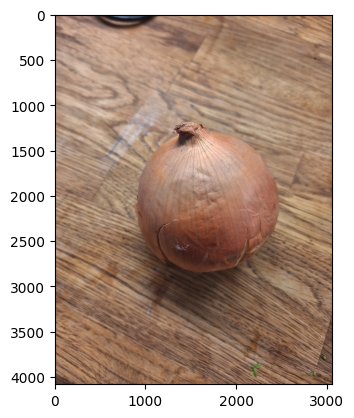

In [8]:
YOUR_IMAGE_PATH = '/content/drive/MyDrive/Projects/vegetable_identifier/new_test_images/20240305_154531.jpg'
img_path = YOUR_IMAGE_PATH
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Make the prediction!

And now we can use the model to predict the mostly likely vegetable from the currently available categories.

In [10]:
categories = ['bell_pepper','broccoli','carrot','lettuce','mushroom','onion','peas','tomato']

resize = tf.image.resize(img, (224,224))
predicted_probs = model.predict(np.expand_dims(resize/255, 0), verbose=False)
predicted_class = np.argmax(predicted_probs)
print(f"Predicted class is {categories[predicted_class]}")

Predicted class is onion
